## Lab Introduction
Advances in medicine, an increase in healthcare facilities, and improved standards of care have all contributed to an increased overall life expectancy over the last few decades. Although this might seem like great achievement for humanity, it has also led to the abandonment of more elderly people into senior-care and assisted living communities. The morality, benefits, and disadvantages of leaving one's parents in such facilities are still debatable; however, the fact that this practice has increased the financial burden on both the private-sector and government is not.

In this lab, you will be using the subset a life expectancy dataset, provided courtesy of the Center for Disease Control and Prevention's National Center for Health Statistics page. The page hosts many open datasets on topics ranging from injuries, poverty, women's health, education, health insurance, and of course infectious diseases, and much more. But the one you'll be using is their "Life expectancy at birth, at age 65, and at age 75, by sex, race, and origin" data set, which has statistics dating back from the 1900's to current, taken within the United States. We have included a copy of the dataset as **[life_expectancy.csv](https://drive.google.com/file/d/15FD3Ix2kgYT4rK5dnUassjA4aeKN7mVp/view?usp=sharing)**. The dataset only lists the life expectancy of whites and blacks, because throughout most of the collection period, those were the dominant two races that actively had their statistics recorded within the U.S.

Using linear regression, you will extrapolate how long people will live in the future. The private sector and governments mirror these calculations when computing social security payouts, taxes, infrastructure, and more. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') # Look Pretty

### A Convenience Function

This convenience method will take care of plotting your test observations, comparing them to the regression line, and displaying the R2 coefficient

In [2]:
def drawLine(model, X_test, y_test, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    print("Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
    print("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
    print("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])

    score = model.score(X_test, y_test)
    title += " R2: " + str(score)
    ax.set_title(title)

    plt.show()

## 1. Data Preparation

Load up the data here into a variable called `X`. As usual, do a .describe and a print of your dataset and compare it to the dataset loaded in a text file or in a spread sheet application:

In [4]:
# .. your code here ..
X = pd.read_csv("life_expectancy.csv",delimiter="\t")
X.head()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
0,1900,46.6,48.7,32.5,33.5
1,1950,66.5,72.2,59.1,62.9
2,1960,67.4,74.1,61.1,66.3
3,1970,68.0,75.6,60.0,68.3
4,1975,69.5,77.3,62.4,71.3


In [6]:
X.describe()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1991.250000,72.730000,78.592500,65.912500,73.262500
std,20.536085,4.968681,5.200561,6.422284,7.157592
min,1900.000000,46.600000,48.700000,32.500000,33.500000
25%,1984.750000,71.800000,78.700000,64.575000,73.400000
50%,1994.500000,73.350000,79.650000,65.250000,73.900000
75%,2004.250000,75.500000,80.500000,69.425000,76.125000
max,2014.000000,76.700000,81.400000,72.500000,78.400000


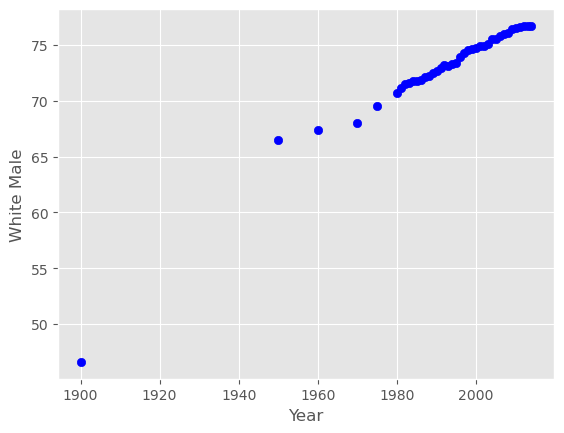

In [7]:
plt.scatter(X.Year, X.WhiteMale, color='blue')
plt.xlabel("Year")
plt.ylabel("White Male")
plt.show()


Create your linear regression model here and store it in a variable called `model`. Don't actually train or do anything else with it yet:

In [ ]:
# .. your code here ..
from sklearn import linear_model
model = linear_model.LinearRegression()


Slice out your data manually (e.g. don't use `train_test_split`, but actually do the indexing yourself. Set `X_train` to be year values LESS than 1986, and `y_train` to be corresponding 'WhiteMale' age values. You might also want to read the note about slicing on the bottom of this document before proceeding:

In [15]:
# .. your code here ..from sklearn import linear_model
X_train = X[['Year']].iloc[1:11,:]
y_train = X[['WhiteMale']].iloc[1:11,:]

## 2. Training the Model
Train your model then pass it into `drawLine` with your training set and labels. 

In [17]:
# .. your code here ..
model.fit(X_train, y_train)
print ('Coefficients: ', model.coef_)
print ('Intercept: ', model.intercept_)

Coefficients:  [[0.16593496]]
Intercept:  [-257.73154472]


Est 2014 White Male Life Expectancy:  [76.46146341]
Est 2030 White Male Life Expectancy:  [79.11642276]
Est 2045 White Male Life Expectancy:  [81.60544715]


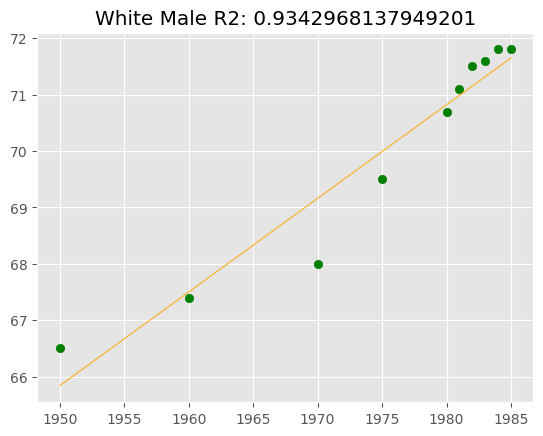

In [23]:
drawLine(model, X_train, y_train, "White Male")

## 3. Model Evaluation
You can title the model 'WhiteMale'. `drawLine` will output to the console a 2014 extrapolation / approximation for what it believes the WhiteMale's life expectancy in the U.S. will be... given the pre-1986 data you trained it with. It'll also produce a 2030 and 2045 extrapolation:

In [33]:
# .. your code here ..
from sklearn.metrics import r2_score

X_test = X[['Year']].iloc[12:]
y_test = X[['WhiteMale']].iloc[12:]
y_test_ = model.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_test_) )

Mean absolute error: 0.45
Residual sum of squares (MSE): 0.25
R2-score: 0.89


Print the actual 2014 'WhiteMale' life expectancy from your loaded dataset

In [31]:
# .. your code here ..
X.loc[X['Year'] == 2014]

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
39,2014,76.7,81.4,72.5,78.4


Repeat the process, but instead of for WhiteMale, this time select BlackFemale. Create a slice for BlackFemales, fit your model, and then call `drawLine`. Lastly, print out the actual 2014 BlackFemale life expectancy:

Coefficients:  [[0.18455285]]
Intercept:  [-301.34186992]
Est 2014 Black Male Life Expectancy:  [70.34756098]
Est 2030 Black Male Life Expectancy:  [73.3004065]
Est 2045 Black Male Life Expectancy:  [76.06869919]


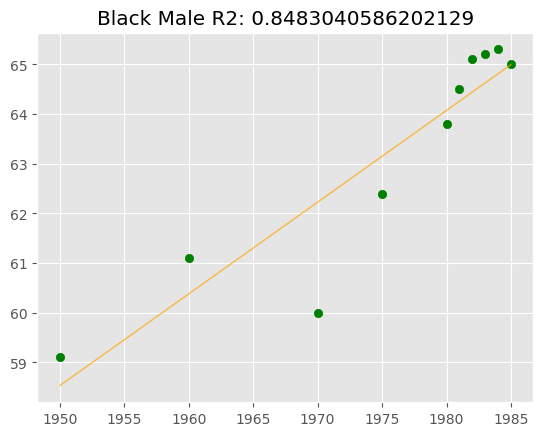

Mean absolute error: 6.82
Residual sum of squares (MSE): 46.48
R2-score: -19.82


In [34]:
# .. your code here .. 
X_train = X[['Year']].iloc[1:11,:]
y_train = X[['BlackMale']].iloc[1:11,:]
model.fit(X_train, y_train)
print ('Coefficients: ', model.coef_)
print ('Intercept: ', model.intercept_)
drawLine(model, X_train, y_train, "Black Male")

X_test = X[['Year']].iloc[12:]
y_test = X[['WhiteMale']].iloc[12:]
y_test_ = model.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_test_) )

Lastly, print out a correlation matrix for your entire dataset, and display a visualization of the correlation matrix, just as we described in the visualization section of the course:

In [37]:
# .. your code here ..
import seaborn as sns
sns.heatmap(X.corr(), annot=True)

<AxesSubplot:>

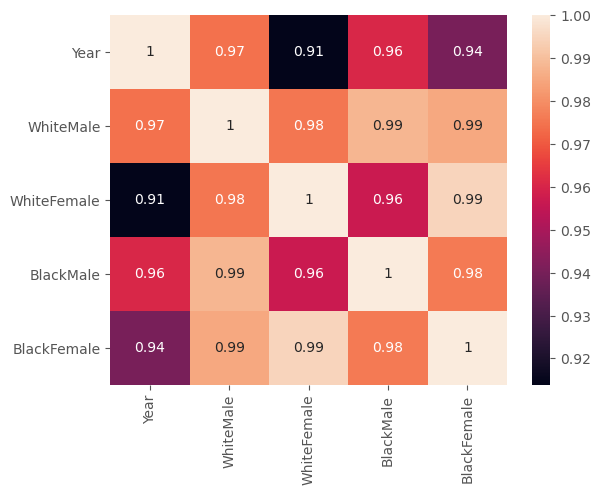

In [38]:
plt.show()

## Notes On Fitting, Scoring, and Predicting:

Here's a hint to help you complete the lab without pulling your hair out! When you use `.fit()`, `.score()`, and `.predict()` on your model, SciKit-Learn expects your training data to be in spreadsheet (2D Array-Like) form. This means you can't simply pass in a 1D Array (slice) and get away with it.

To properly prep your data, you have to pass in a 2D Numpy Array, or a dataframe. But what happens if you really only want to pass in a single feature?

If you slice your dataframe using `df[['ColumnName']]` syntax, the result that comes back is actually a _dataframe_. Go ahead and do a `type()` on it to check it out. Since it's already a dataframe, you're good -- no further changes needed.

But if you slice your dataframe using the `df.ColumnName` syntax, OR if you call `df['ColumnName']`, the result that comes back is actually a series (1D Array)! This will cause SKLearn to bug out. So if you are slicing using either of those two techniques, before sending your training or testing data to `.fit` / `.score`, do `any_column = my_column.reshape(-1,1)`. 

This will convert your 1D array of `[n_samples]`, to a 2D array shaped like `[n_samples, 1]`. A single feature, with many samples.

If you did something like `my_column = [my_column]`, that would produce an array in the shape of `[1, n_samples]`, which is incorrect because SKLearn expects your data to be arranged as `[n_samples, n_features]`. Keep in mind, all of the above only relates to your `X` or input data, and does not apply to your `y` or labels.